In [12]:
import pandas as pd
data = pd.read_csv('titanic.csv')
data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
#instalation 
!pip install matplotlib


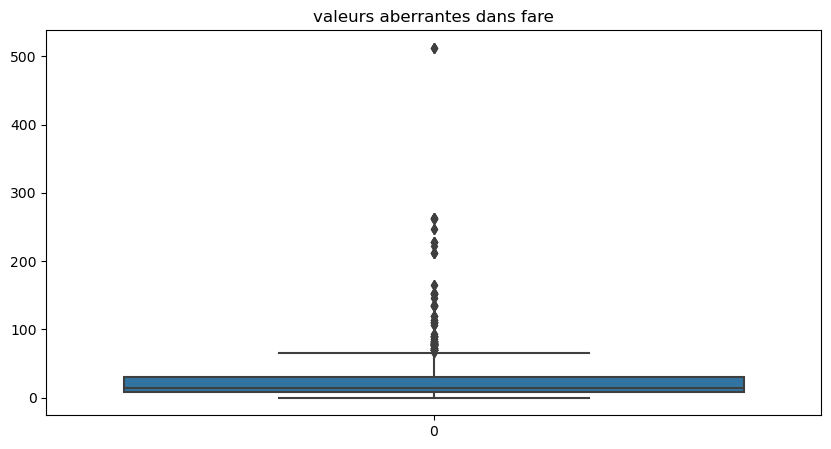

In [13]:
#visualiser la distribution des valeus des  dans fare 
import matplotlib.pylab as plt
import seaborn as sns #pour affiche le figure 
plt.figure(figsize=(10,5))
sns.boxplot(data['Fare'])
plt.title("valeurs aberrantes dans fare")
plt.show()

In [14]:
#calculer les quartiles et l'IQR POUR LA COLONNE 'Fare'
Q1 = data['Fare'].quantile (0.25)#PREMIER QUARTILE
Q3 = data['Fare'].quantile(0.75)#TROISIEME QUARTILES
IQR = Q3 - Q1 #calcul de L'IQR

In [15]:
#2.Définir les bornes pour détecter les valeurs aberrants
borne_inferieure = Q1 -1.5 * IQR
borne_superieure = Q3 + 1.5 * IQR
print("Q1(25éme PERCENTILE): ",Q1)
print("Q3(75éme PERCENTILE): ",Q3)
print("IQR:",IQR)
print("Borne Inférieure: ",borne_inferieure)
print("Borne supérieure: ",borne_superieure)

Q1(25éme PERCENTILE):  7.9104
Q3(75éme PERCENTILE):  31.0
IQR: 23.0896
Borne Inférieure:  -26.724
Borne supérieure:  65.6344


In [16]:
# IDENTIFICATION LES VALEURS ABERRANTES
valeurs_aberrantes = data[(data['Fare']<borne_inferieure)|(data['Fare']>borne_superieure)]
print ("Valeurs aberrante dans Fare :",valeurs_aberrantes)

Valeurs aberrante dans Fare :      PassengerId  Survived  Pclass  \
1              2         1       1   
27            28         0       1   
31            32         1       1   
34            35         0       1   
52            53         1       1   
..           ...       ...     ...   
846          847         0       3   
849          850         1       1   
856          857         1       1   
863          864         0       3   
879          880         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
27                      Fortune, Mr. Charles Alexander    male  19.0      3   
31      Spencer, Mrs. William Augustus (Marie Eugenie)  female   NaN      1   
34                             Meyer, Mr. Edgar Joseph    male  28.0      1   
52            Harper, Mrs. Henry Sleeper (Myna Haxtun)  female  49.0      1   
..                                     

In [17]:
#4.Traitement des valeurs aberrantes
#ici nous remplaçons les valeurs aberrantes par la mediane de la colonne 'Fare'
import numpy as np
data['Fare'] = np.where(data['Fare']>borne_superieure,data['Fare'].median(),data['Fare'])

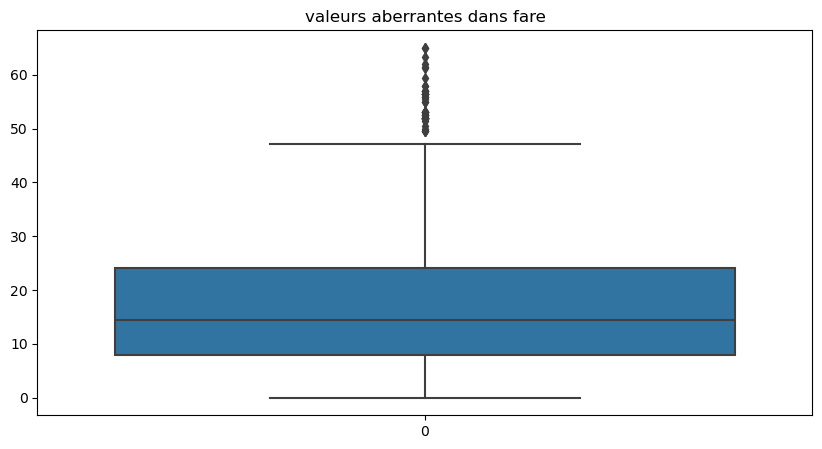

In [18]:
#visualiser la distribution des valeus des  dans fare 
import matplotlib.pylab as plt
import seaborn as sns #pour affiche le figure 
plt.figure(figsize=(10,5))
sns.boxplot(data['Fare'])
plt.title("valeurs aberrantes dans fare")
plt.show()

In [19]:
#affichages des donnes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
#solution 
#option1:Supprimer toutes les lignes ou on est donne manquante
data.dropna(inplace=True)

In [20]:
#verification
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [27]:
#Remarque :on voit que vous avons supprimé toute les linges


In [ ]:
#options2:  supprimé toute les linges ou  toutes les  entrées maquantes (how='all') 
#ou encore ou au moins4entrée sont manquantes

In [21]:
data.dropna(thresh = 4,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
#On voit clairement que Cabin pose un problème on la supprime
data.drop(['Cabin'],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


 #a present, nous allons traiter les données manquantes
#Pour l'age on va replacer les données manquantes par la moyenne des ages 

In [25]:
data.Age.fillna(data.Age.mean(),inplace=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
#Embarked il s'agit d'une donne ctegorielle you mean chaine de caractere
#on ne peut pas utilise la moyenne
#soulition: on remplace les donnes manquantes par la valeur la plus courrante(cen'est pas "S" )
#.mode()[0]

In [27]:

data.Embarked.fillna(data.Embarked.mode()[0],inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [29]:
print(data.Embarked.mode()[0])

S


In [30]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,14.4542,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [32]:
#suppression de la colonne PassengerId pour optimiser data
data.drop(['PassengerId'],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [33]:
data.head() #affichage

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,14.4542,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [35]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [37]:
#categorielle=labelincoder
#transformation de donnees 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Transformation des colonnes catégorielles
data["Name"] = le.fit_transform(data["Name"])
data["Sex"] = le.fit_transform(data["Sex"])
data["Ticket"] = le.fit_transform(data["Ticket"])
data["Embarked"] = le.fit_transform(data["Embarked"])

# Affichage des premières lignes du DataFrame après transformation
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,108,1,22.0,1,0,523,7.2500,2
1,1,1,190,0,38.0,1,0,596,14.4542,0
2,1,3,353,0,26.0,0,0,669,7.9250,2
3,1,1,272,0,35.0,1,0,49,53.1000,2
4,0,3,15,1,35.0,0,0,472,8.0500,2


In [38]:
#normalisation des salaires
from sklearn.preprocessing import MinMaxScaler

# Créer un MinMaxScaler
scaler = MinMaxScaler()

# Liste des colonnes à normaliser
colonnes_a_normaliser = ['Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Embarked']

# Transformer les données
data[colonnes_a_normaliser] = scaler.fit_transform(data[colonnes_a_normaliser])

data.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1.0,0.121348,1.0,0.271174,0.125,0.000000,0.769118,0.111538,1.0
1,1,0.0,0.213483,0.0,0.472229,0.125,0.000000,0.876471,0.222372,0.0
2,1,1.0,0.396629,0.0,0.321438,0.000,0.000000,0.983824,0.121923,1.0
3,1,0.0,0.305618,0.0,0.434531,0.125,0.000000,0.072059,0.816923,1.0
4,0,1.0,0.016854,1.0,0.434531,0.000,0.000000,0.694118,0.123846,1.0
5,0,1.0,0.622472,1.0,0.367921,0.000,0.000000,0.404412,0.130128,0.5
6,0,0.0,0.578652,1.0,0.673285,0.000,0.000000,0.125000,0.797885,1.0
7,0,1.0,0.701124,1.0,0.019854,0.375,0.166667,0.580882,0.324231,1.0
8,1,1.0,0.462921,0.0,0.334004,0.000,0.333333,0.505882,0.171282,1.0
9,1,0.5,0.647191,0.0,0.170646,0.125,0.000000,0.194118,0.462628,0.0


In [39]:
# Subdivision des données
#x=FEATURE
#Y=TARGET
X = data[['Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Embarked']]
y = data['Survived']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [42]:
#entrainer le modèle
from sklearn.tree import DecisionTreeClassifier
arbre = DecisionTreeClassifier(criterion='entropy',random_state=0)
arbre.fit(X_train,y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [41]:
# calcul du score de precision 
from sklearn.metrics import accuracy_score
y_pred = arbre.predict(X_test)  
score = accuracy_score(y_test, y_pred)  
print(score)

0.7322033898305085
